# Presidential Speeches Analysis

We are going to analyze all past inaugural speeches given by presidents of the USA. All speeches are accessible via the nltk corpus. In our analysis, we will aim to characterize length, the most frequent words, the progression of sentiment, and readability for each of our speeches. We will also graph these findings using pyplot. 

In [184]:
import nltk
from nltk.corpus import stopwords 
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import pyphen
from wordcloud import WordCloud
import re
import string



In [6]:
presidents = inaugural.fileids()
len(presidents)

58

In [219]:
presidents[0]

'1789-Washington.txt'

In [221]:
#We have confirmed that we have all presidential inaugural speeches, ranging from Washington's to Trump's
#We can now clean the data, by removing stopwords and punctuation, and make a list wherein each element contains a tokenized list 
# of each speech's contents

#make lowercase!!!

stop_words = stopwords.words('english')
punctuation=[',','.','-',';',':','--',"'",'(',')']
for p in punctuation:
    stop_words.append(p)
stop_words=set(stop_words)

speeches_clean=[None]*len(presidents)
count = 0
for x in presidents:
    words=list(inaugural.words(fileids=x))
    for w in range(len(words)):
        words[w] = words[w].lower()
    for i in stop_words:
        if i in words:
            while i in words:
                words.remove(i)
    speeches_clean[count] = words
    if(count<len(presidents)-1):
        count = count + 1




In [185]:
#remove non-alphabet characters
for speech in speeches_clean:
    for i in range(len(speech)):
        speech[i] = re.sub('\w*\d\w*', '', speech[i])


In [225]:
speeches_clean[0]

['fellow',
 'citizens',
 'senate',
 'house',
 'representatives',
 'among',
 'vicissitudes',
 'incident',
 'life',
 'event',
 'could',
 'filled',
 'greater',
 'anxieties',
 'notification',
 'transmitted',
 'order',
 'received',
 '14th',
 'day',
 'present',
 'month',
 'one',
 'hand',
 'summoned',
 'country',
 'whose',
 'voice',
 'never',
 'hear',
 'veneration',
 'love',
 'retreat',
 'chosen',
 'fondest',
 'predilection',
 'flattering',
 'hopes',
 'immutable',
 'decision',
 'asylum',
 'declining',
 'years',
 'retreat',
 'rendered',
 'every',
 'day',
 'necessary',
 'well',
 'dear',
 'addition',
 'habit',
 'inclination',
 'frequent',
 'interruptions',
 'health',
 'gradual',
 'waste',
 'committed',
 'time',
 'hand',
 'magnitude',
 'difficulty',
 'trust',
 'voice',
 'country',
 'called',
 'sufficient',
 'awaken',
 'wisest',
 'experienced',
 'citizens',
 'distrustful',
 'scrutiny',
 'qualifications',
 'could',
 'overwhelm',
 'despondence',
 'one',
 'inheriting',
 'inferior',
 'endowments',
 'n

In [186]:
# #Let us find the collective most frequently used words, across all speeches
freq1 = nltk.FreqDist(speeches_clean[3])
freq1


FreqDist({'government': 12, 'us': 10, 'may': 8, 'fellow': 7, 'citizens': 7, 'let': 7, 'shall': 6, 'principle': 6, 'would': 6, 'one': 6, ...})

[('government', 600), ('people', 584), ('us', 478), ('upon', 371), ('must', 366), ('great', 340), ('may', 338), ('world', 338), ('states', 333), ('country', 318), ('nation', 316), ('shall', 314), ('every', 299), ('one', 257), ('peace', 255), ('new', 252), ('citizens', 247), ('power', 236), ('public', 226), ('america', 220)]


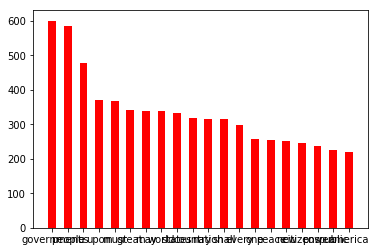

In [230]:
presidents_words=[]
for speech in speeches_clean:
    for word in speech:
        presidents_words.append(word)

from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

c = Counter(presidents_words)
plt.bar(*zip(*c.most_common(20)), width=0.5, color='r')
print(c.most_common(20))


# Things to do

- fix plot
- create a dataframe
- analyze based on length - scatter plot - DONE
- do readability
- size of vocabulary
- try to do sentiment analysis 

In [202]:
#creating a dataframe
#one column with presidents, another with the speeches_clean
import pandas as pd
list_of_tuples = list(zip(presidents, speeches_clean))
list_of_tuples
df = pd.DataFrame(list_of_tuples, columns = ['Presidents', 'Speeches'])
df

,Presidents,Speeches
0,1789-Washington.txt,"[fellow, citizens, senate, house, representati..."
1,1793-Washington.txt,"[fellow, citizens, called, upon, voice, countr..."
2,1797-Adams.txt,"[first, perceived, early, times, middle, cours..."
3,1801-Jefferson.txt,"[friends, fellow, citizens, called, upon, unde..."
4,1805-Jefferson.txt,"[proceeding, fellow, citizens, qualification, ..."
5,1809-Madison.txt,"[unwilling, depart, examples, revered, authori..."
6,1813-Madison.txt,"[add, solemnity, oath, obligations, imposed, s..."
7,1817-Monroe.txt,"[destitute, feeling, deeply, affected, strong,..."
8,1821-Monroe.txt,"[fellow, citizens, shall, attempt, describe, g..."
9,1825-Adams.txt,"[compliance, usage, coeval, existence, federal..."


In [203]:
df.to_pickle("corpus.pkl")

[651, 60, 1070, 824, 1009, 522, 548, 1578, 2049, 1362, 525, 549, 1898, 3831, 2308, 527, 1587, 1391, 1653, 347, 539, 614, 1200, 1447, 812, 2105, 987, 1942, 1088, 446, 2585, 811, 665, 1720, 1871, 1713, 918, 935, 633, 258, 1137, 1228, 809, 702, 703, 1018, 840, 584, 1166, 1311, 1094, 796, 1126, 778, 1082, 1172, 1054, 719]


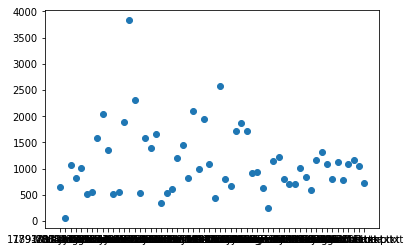

In [224]:
length_speeches = [None]*len(presidents)
for i in range(len(speeches_clean)):
    length_speeches[i] = len(speeches_clean[i])

print(length_speeches)
plt.scatter(presidents,length_speeches)
plt.show()

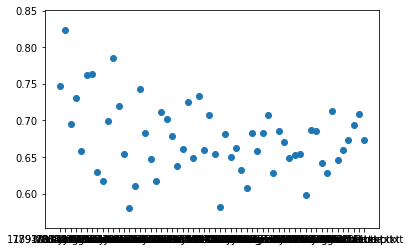

In [218]:
#Size of vocabulary - can be compiled by finding number of unique words, using hapaxes
presidents_vocab=[]
for x in presidents:
    words=nltk.FreqDist(inaugural.words(fileids = x))
    presidents_vocab.append(len(words.hapaxes())/len(words))

plt.scatter(presidents,presidents_vocab)
plt.show()

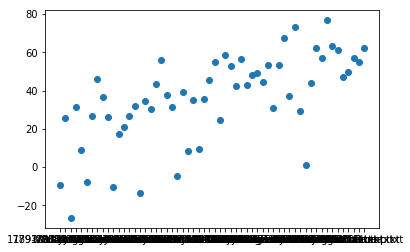

In [242]:
#Readability
import textstat

readability_index = [None]*len(presidents)
count = 0
for p in presidents:
    readability_index[count] = textstat.flesch_reading_ease(inaugural.raw(fileids = p))
    if(count<len(presidents)-1):
        count = count + 1


plt.scatter(presidents,readability_index)




In [243]:
#Sentiment analysis on the most famous speeches
